In [1]:
from ramCOH.signal_processing import functions as f
import ramCOH.raman as ram
from ramCOH.signal_processing import curves as c
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotting as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
import csaps as cs
from ramCOH.signal_processing import curve_fitting as cf
from ramCOH.signal_processing import deconvolution as d
import numpy as np

In [55]:
glass_file = "./glass/PI052-03-04_2021_11_18_13_02_42_532nm_Edge_50%_x100_VIS_LWD_H50_1800 (450-850nm)_150s x 2_01.txt"


x, y = np.genfromtxt(glass_file, unpack=True)
olivine_file = "./olivine/PI052-03_2021_11_29_15_43_43_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
olivine_x, olivine_y = np.genfromtxt(olivine_file, unpack=True)

In [56]:
glass = ram.H2O(x, y)
olivine = ram.Olivine(olivine_x, olivine_y)


In [93]:
birs = np.array(
    [
        [100, 185],
        [260, 272],
        [370, 380],
        [470, 515],
        [660, 740],
        [890, 905],
        [925, 930],
        [1000, 4000],
    ]
)
olivine.baselineCorrect(baseline_regions=birs)
olivine.deconvolve(y="baseline_corrected", fit_window=6, noise_threshold=0.4)


/Users/thomas/Desktop/ramCOH/ramCOH/signal_processing/deconvolution.py:151: UserWarning: Noise improved by <10%, using previous result
  warnings.warn("Noise improved by <10%, using previous result")


In [94]:
olivine_fitted = ram.Olivine(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters))
olivine_fitted.baselineCorrect(baseline_regions=birs)

In [98]:
boundary_left = 780
boundary_right = 900
ol_x, ol_y, glass_corr, glass_spline = glass.subtract_olivine_host(olivine, boundaries=[boundary_left, boundary_right])

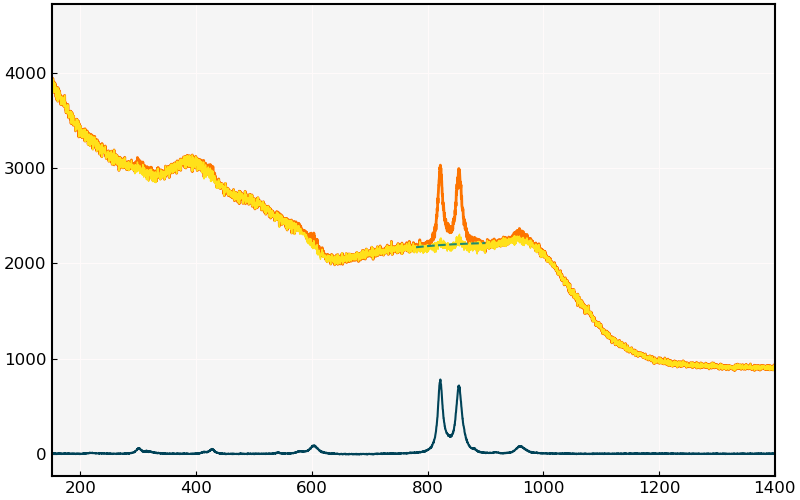

In [103]:
%matplotlib widget

trim = (ol_x > boundary_left) & (ol_x < boundary_right)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y, linewidth=2)

plt.plot(ol_x, ol_y, linewidth=1.5)
# for peak_params in olivine.deconvoluted_peaks:
#     plt.plot(ol_x, c.GaussLorentz(ol_x, **peak_params), linewidth=1)
# plt.plot(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.6)



plt.plot(ol_x, glass_corr, linewidth=1)
plt.plot(ol_x[trim], glass_spline[trim], linewidth=1.5, linestyle="--")

ax.set_xlim(150, min(max(ol_x), 1400))


plt.show()

In [ ]:
import csaps as cs
xbir, ybir = f._extractBIR(x, y, np.array([[0,780],[900,4000]]))
spline = cs.csaps(xbir, ybir, smooth=1e-6)
spectrum_spline = spline(x)
olivine_interference = y - spectrum_spline

noise_area = (x > 1250) & (x < 2000)
noise = olivine_interference[noise_area].std(axis=None)

trim = (x > 700) & (x < 1100)
olivine_trim = olivine_interference[trim]
x_trim = x[trim]

In [ ]:
olivine_fit = ram.RamanProcessing(x_trim, olivine_trim)
        # print("fitting interference")
olivine_fit.deconvolve(
    peak_prominence=10,
    noise_threshold=1.5,
    threshold_scale=0.0,
    min_amplitude=6,
    min_peak_width=6,
    fit_window=6,
    noise=noise,
    max_iterations=3,
)

In [ ]:
olivine_fit.deconvolution_parameters

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y, linewidth=2)
plt.plot(olivine_x, olivine_y, linewidth=1.5)
plt.plot(x_trim, olivine_trim, alpha=0.8)


plt.xlim(0,2000)

plt.show()

In [ ]:
# birs = np.array([[0, 250], [460, 550], [650, 750], [1020, 4000]])
birs = np.array([[0, 780], [900,4000]])
# birs = np.array([[0, 730], [1015, 4000]])
glass = ram.H2O(x, y)
glass.extract_olivine(olivine_x, olivine_y, birs=birs, fit_window=6, smooth=1e-6, peak_prominence=10)
# glass.interpolate(interpolate=[790,890])

In [ ]:
from ramCOH.signal_processing import curve_fitting as cv
import scipy.signal as signal

xbir, ybir = f._extractBIR(x, y, np.array([[780,890]]))
_, centers, widths = cv._find_peak_parameters(xbir, xbir, 100)
centers, widths
signal.find_peaks(ybir, 1e4)

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y, linewidth=2)
plt.plot(glass.x, glass.olivine_interference, linewidth=1.5)
plt.plot(glass.x, glass.spectrum_spline, linewidth=2)
plt.plot(glass.x, glass.signal.olivine_corrected, linewidth=1.2, alpha=0.8)
# plt.plot(glass.x, c.sum_GaussLorentz(glass.x, *glass.olivine_main_peaks), linewidth=1.2)
plt.plot(glass.x, glass.olivine / glass.olivine_scale, linewidth=1.5, alpha=0.8)

plt.xlim(0,1500)
plt.show()

In [ ]:
glass.olivine

In [ ]:
glass.olivine.max() / c.sum_GaussLorentz(glass.x, *glass.olivine_main_peaks).max(), glass.olivine_scale


In [ ]:
np.sort(glass.olivine_main_peaks[1])[-2:]


In [ ]:
birs = np.array([[0, 740], [900, 910], [1000, 4000]])
xbir, ybir = f._extractBIR(glass.x, glass.intensities["raw"], birs)
cs.csaps(xbir, ybir, 1e-6)

In [ ]:
birs = np.array([[0,740],[900,910], [1000,4000]])
xbir, ybir = f._extractBIR(glass.x, glass.intensities["raw"], birs)

In [ ]:
spline = cs.csaps(xbir, ybir, smooth=1e-6)
spectrum_spline = spline(glass.x)
olivine = glass.intensities["raw"] - spectrum_spline

In [ ]:
noise_area = (glass.x > 1250) & (glass.x < 2000)
noise = olivine[noise_area].std(axis=None)
print(noise)

In [ ]:
trim = (glass.x > 700) & (glass.x < 1400)
x_trim = glass.x[trim]
olivine_trim = olivine[trim]

In [ ]:
fit_window = 8
_, centers, widths = cf._find_peak_parameters(
            x_trim, olivine_trim, prominence=8
        )
fit_areas = cf._get_peakFit_ranges(
    centers=centers, half_widths=widths, fit_window=fit_window
)
print(fit_areas)
print(centers)

In [ ]:
noise_threshold = 3
threshold_scale = 0.1

threshold_scaler = (
            lambda y: (
                (y / olivine_trim.max() * 2 * threshold_scale) + (1 - threshold_scale)
            )
            * noise_threshold
        )

In [ ]:
peak_prominence = 8
cutoff_high = 1400

fitted_parameters = []
for area in fit_areas:
    xtrim, ytrim = cf._trimxy_ranges(x_trim, olivine_trim, area)
    noise_threshold_local = threshold_scaler(ytrim.max())
    
    parameters, *_ = d.deconvolve_signal(
        x=xtrim,
        y=ytrim,
        noise_threshold=noise_threshold_local,
        min_amplitude=6,
        min_peak_width=6,
        prominence=2,
        noise=noise,
        max_iterations=3,
        baseline0=True
    )
    fitted_parameters.append(parameters)

deconvolution_parameters = []
for parameter in zip(*fitted_parameters):
    deconvolution_parameters.append(np.concatenate(parameter))

print(deconvolution_parameters)

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y, linewidth=2)
# plt.plot(glass.x, spectrum_spline)
plt.plot(glass.x, glass.olivine)
plt.plot(glass.x, c.sum_GaussLorentz(glass.x, *deconvolution_parameters))


plt.xlim(0,2000)
plt.ylim(-500,7e3)

plt.show()

In [ ]:
prominence = 8

amplitudes, centers, widths = cf._find_peak_parameters(
            glass.x, olivine, prominence= prominence
        )

print(amplitudes, centers, widths)

In [ ]:
cf._get_peakFit_ranges(centers, widths, fit_window=8)

In [ ]:
glass.olivine_main_peaks